# Data Analytics Fall 2025 &mdash; Exercises 5

### XXXXX XXXXX (last modified: Tue 4 Nov)

- Five problems + round 4 peer review
- Theme: linear regression
- Keep your originals up to date by running the code cell below:

In [ ]:
import os
os.system('/usr/bin/bash /home/varpha/dan/config.sh');

## Round 4 peer review

As usual.


## Problem 1. Basic

a) Write a function *least_square_fit* that takes two one-dimensional arrays x and y as parameters. The function should return a tuple (slope, intercept) of the fitted line. Write a main program that tests the *least_square_fit* function with some example arrays, and for each pair of arrays outputs the (slope, intercept) tuple.

b) Modify your main function to plot a scatter plot of the data points along with the fitted line. Also display the values of the slope and intercept from part a) in the figure.

## Use of AI in this exercise
I leveraged AI tools (ie chatgpt) to:
- Learn new concepts related to tasks
- Brainstorm solutions
- Generate and adapt sample code to solve the problems in different ways

## Solution 1

Test case 1: slope = 0.600, intercept = 2.200
Test case 1: Scatter plot of the data points along with the fitted line


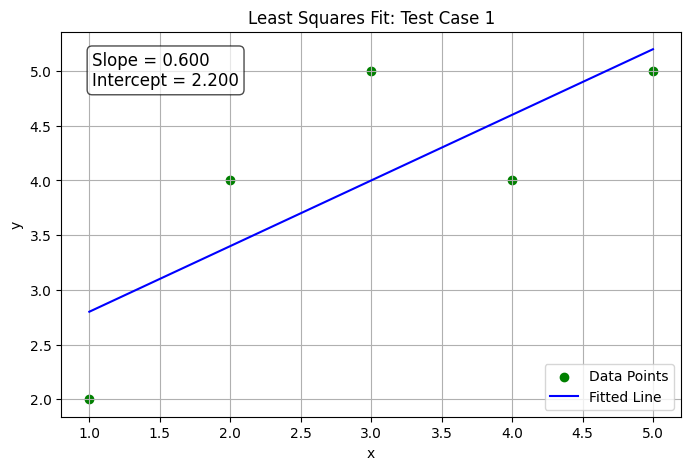

Test case 2: slope = 2.000, intercept = 1.000
Test case 2: Scatter plot of the data points along with the fitted line


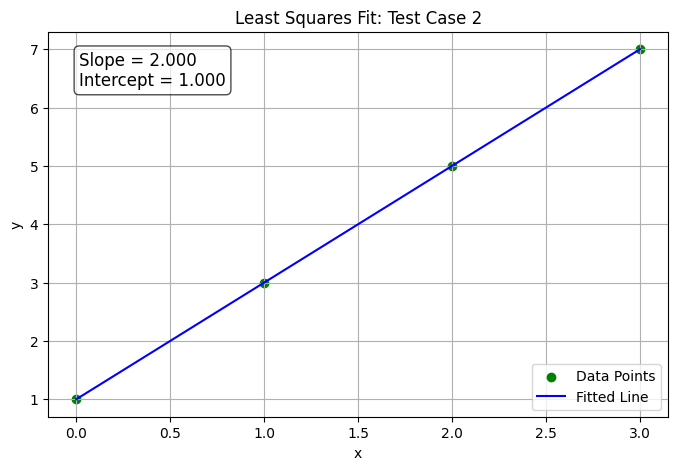

Test case 3: slope = 0.650, intercept = -0.500
Test case 3: Scatter plot of the data points along with the fitted line


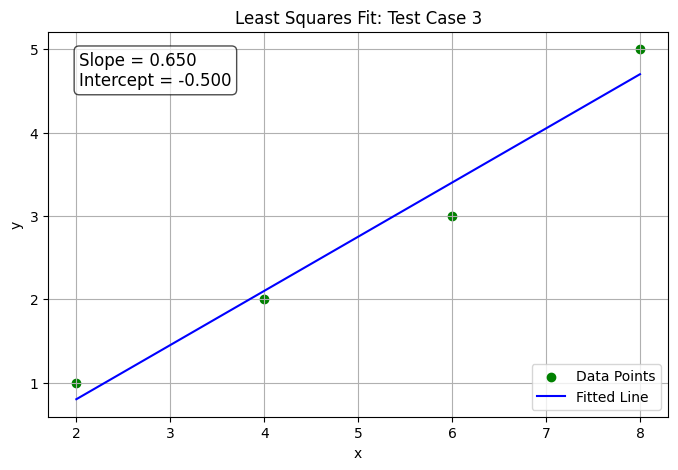

Test case 4: slope = 0.395, intercept = 2.519
Test case 4: Scatter plot of the data points along with the fitted line


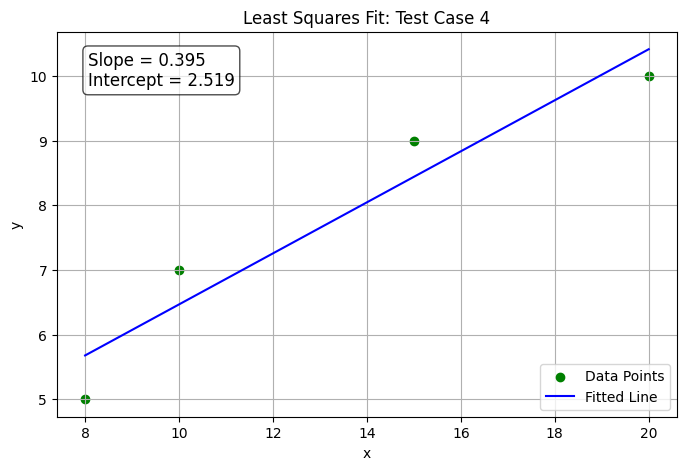

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Define a function which takes two one-dimensional arrays x and y as input parameters
# Returns a tuple (slope, intercept) of the fitted line
def least_square_fit(x, y):
    """
    Compute the least squares fit line for data points (x, y)

    Parameters: x -> 1D array and y -> 1D array of
    Returns: tuple -> (slope, intercept)
    """

    # Convert input arrays to NumPy arrays to perform vectorized mathematical operations
    x = np.array(x)
    y = np.array(y)
    
    # Compute means for the input arrays x and y
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    # Compute slope and intercept using standard formulas
    slope = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)
    intercept = y_mean - slope * x_mean
    
    return slope, intercept

# Create a sample data for testing
test_cases = [
    ([1, 2, 3, 4, 5], [2, 4, 5, 4, 5]),
    ([0, 1, 2, 3], [1, 3, 5, 7]),
    ([2, 4, 6, 8], [1, 2, 3, 5]),
    ([8, 10, 15, 20], [5, 7, 9, 10]),
]

# Run tests and print the results
for i, (x, y) in enumerate(test_cases, 1):
    slope, intercept = least_square_fit(x, y)
    print(f"Test case {i}: slope = {slope:.3f}, intercept = {intercept:.3f}")

    print(f"Test case {i}: Scatter plot of the data points along with the fitted line")
    # Create fitted line values
    plot_x = np.linspace(min(x), max(x), 20)
    plot_y = slope * plot_x + intercept

    # Plot a scatter plot of the data points along with the fitted line
    plt.figure(figsize=(8, 5))
    plt.scatter(x, y, color='green', label='Data Points')
    plt.plot(plot_x, plot_y, color='blue', label='Fitted Line')
    
    # Display slope and intercept in the plot
    plt.text(0.05, 0.95, f"Slope = {slope:.3f}\nIntercept = {intercept:.3f}",
             transform=plt.gca().transAxes, fontsize=12,
             verticalalignment='top', bbox=dict(boxstyle="round", facecolor="white", alpha=0.7))
    
    plt.title(f"Least Squares Fit: Test Case {i}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(loc = 'lower right')
    plt.grid(True)
    plt.show()


## Problem 2. Unknown data

There is some unknown data in your `exrc_05/data/XXXXX_unknown_data.csv`. All you know is that the first five columns are the features and the last column is the response. Use scikit-learn's LinearRegression to fit a linear model to this data. Also implement a function `unknown_data` that reads the file, "learns", and returns the correlation coefficient for each of the five features against the response. You don't have to fit the intercept in linear regression, and you also don't have to split the data in your "training". The main method should just print out the coefficient for each of the five features, and use all the data for "training". Do you think that some of the features could be dropped from the model? Why?

*Hint / Clarification:* The problem is cooked up in such a way that the six columns are linearly dependent.

### Solution 2


#### Analysis about which Features could be dropped and why

Based on the correlation coefficients, it is evident that **Feature X3** can be dropped from the model. Its correlation value is extremely close to zero, which indicates that X3 has no linear relationship with the response variable and therefore provides no meaningful predictive value.

**Feature X2** could also be removed. It has a very weak negative correlation with the response, suggesting that it contributes very little to the model’s performance and is unlikely to improve prediction accuracy.

In [21]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from getpass import getuser

def unknown_data(filename):
    """
    Reads a CSV file, fits a Linear Regression model (no intercept)
    Prints the Correlations and Coefficients
    Returns Correlations and Coefficients
    """
    # Load input csv data which is unknown where first five columns are the features and the last column is the response
    data = pd.read_csv(filename)

    # Separate features and response columns
    X = data.iloc[:, :-1] # Features ie extract all the coloumns except last 
    y = data.iloc[:, -1] # Response ei extract last column which is response

    # Fit linear regression without intercept
    model = LinearRegression(fit_intercept=False)
    model.fit(X, y)

    # Display Linear Regression Coefficients 
    print("**** Print Regression Coefficients ****")
    for i, coef in enumerate(model.coef_, 1):
        print(f"Feature X{i}: {coef:.4f}")

    # Compute correlation cofficients for all the features against response
    correlation_coef = X.corrwith(y)

    # Display Feature–Response Correlations
    print("\n**** Print Correlation Cofficients ****")
    for i, corr in enumerate(correlation_coef, 1):
        print(f"Feature X{i}: {corr:.4f}")

    return correlation_coef, model.coef_


# Run the function with unknown data as input file
user = getuser()
csv_location = f'/home/{user}/dan/private/exrc_05/data/{user}_unknown_data.csv'
# csv_location =  "FILE_NAME" ### GIVE FILE_NAME TO RUN THE CODE LOCALLY
# csv_location = "XXXXX_unknown_data.csv"

correlation_coef, regression_coef  = unknown_data(csv_location)

# print("\n**** Print Correlation Coefficients + Regression Coefficients for Features ****")
# for i in range(len(correlation_coef)):
#     cor_coef = correlation_coef[i]
#     reg_coef = regression_coef[i]
#     print(f"Feature X{i+1}:  Correlation Coefficients = {cor_coef:.4f},  Regression Coefficients = {reg_coef:.4f}")


**** Print Regression Coefficients ****
Feature X1: 15.0000
Feature X2: -2.0000
Feature X3: -0.0000
Feature X4: -7.0000
Feature X5: 19.0000

**** Print Correlation Cofficients ****
Feature X1: 0.6065
Feature X2: -0.1033
Feature X3: 0.0082
Feature X4: -0.2841
Feature X5: 0.7560


## Problem 3. Query

The file `exrc_05/data/XXXXX_query.txt` has some fake customer survey data.

a) Which of the other fields affects most on 'general satisfaction' and why? Use correlation coefficients.

b) Fit a linear model using only the field found in a), then plot two plots:
1. a scatter plot with general satisfaction against the field found in part a)
2. a scatter plot with the "actual" and "predicted" general satisfaction values.

Again, no splitting of data (use all the data for training).


### Solution 3

#### Analysis about which field / feature affects most on 'general satisfaction' ie result

Based on the calculated correlation coefficients between all features and **general satisfaction**, the feature **delivery speed** shows the strongest relationship with customer satisfaction. Its correlation value is the highest (in absolute terms), which indicates that changes in **delivery speed** have the largest impact on how customers rate their overall satisfaction.

Correlation of each feature with 'general satisfaction'
                   correlation
delivery speed        0.650632
price level           0.028395
price flexibility     0.524814
supplier image        0.475934
service               0.631233
sales staff image     0.340909
product quality      -0.283340

Most influential field: 'delivery speed'
Correlation coefficient: 0.6506

Scatter plot with general satisfaction against the most influencial feature ´delivery speed´


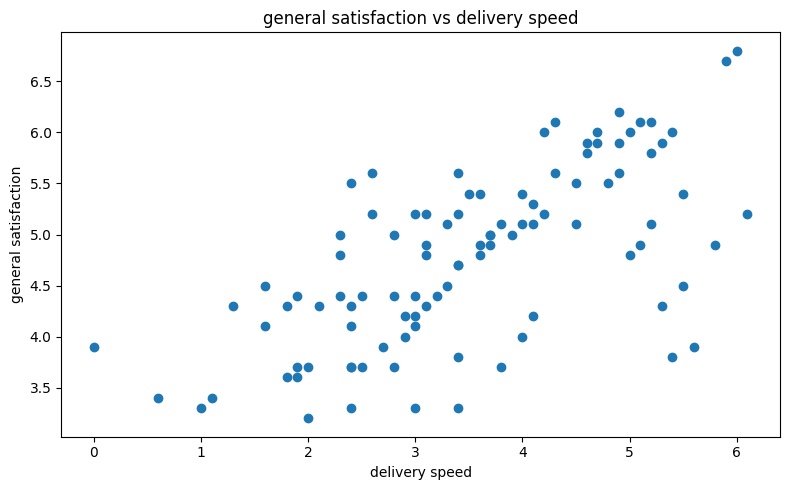


Scatter plot with the actual and predicted general satisfaction values


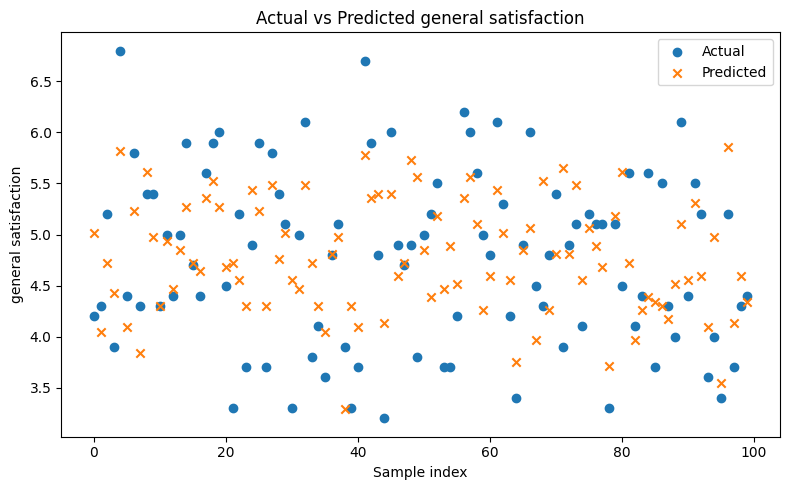

In [27]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from getpass import getuser

user = getuser()
csv_location = f'/home/{user}/dan/private/exrc_05/data/{user}_query.txt'
# csv_location = "XXXXX_query.txt"
# csv_location =  "FILE_NAME" ### GIVE FILE_NAME TO RUN THE CODE LOCALLY

# Load input CSV data which contains fake customer survey data into pandas.DataFrame
data = pd.read_csv(csv_location)

# # Get basic information about data
# print(data.info()) # prints concise summary about DataFrame's structure
# print(data.head()) # prints first five rows - default

# Separate features and response columns
X = data.iloc[:, :-1] # Features ie extract all the columns except last 
y = data.iloc[:, -1] # Response ei extract last column which is response / target

# Compute correlation coeffiecients of all features vs target
correlation_coefs = X.corrwith(y)

print("Correlation of each feature with 'general satisfaction'")
print(correlation_coefs.to_frame(name="correlation"))

# Identify the most influencial feature based upon correlation coeffiecients value
top_feature = correlation_coefs.abs().sort_values(ascending=False).index[0]
top_corr_value = correlation_coefs[top_feature]

print(f"\nMost influential field: '{top_feature}'")
print(f"Correlation coefficient: {top_corr_value:.4f}")

# Prepare single-feature X and target y
X_1 = X[[top_feature]]
y_1 = y

# Fit model
model = LinearRegression()
model.fit(X_1, y_1)

# Predict on full dataset
y_pred = model.predict(X_1)

# Plot 1: Scatter plot with general satisfaction against the most influencial feature ´delivery speed´
print("\nScatter plot with general satisfaction against the most influencial feature ´delivery speed´")
plt.figure(figsize=(8,5))
plt.scatter(X_1[top_feature], y_1)
plt.xlabel(top_feature)
plt.ylabel("general satisfaction")
plt.title(f"general satisfaction vs {top_feature}")
plt.tight_layout()
plt.show()

# Plot 2: Scatter plot with the "actual" and "predicted" general satisfaction values
print("\nScatter plot with the actual and predicted general satisfaction values")
plt.figure(figsize=(8,5))
idx = np.arange(len(y_1))
plt.scatter(idx, y_1, label="Actual", marker="o")
plt.scatter(idx, y_pred, label="Predicted", marker="x")
plt.xlabel("Sample index")
plt.ylabel("general satisfaction")
plt.title("Actual vs Predicted general satisfaction")
plt.legend()
plt.tight_layout()
plt.show()


## Problem 4. Housing, part 1

The file `exrc_05/data/XXXXX_houses.csv` has some fake data on sold houses.

The data is taken from [Kaggle](https://www.kaggle.com/code/jnikhilsai/cross-validation-with-linear-regression) and randomized. The notebook is available in our `public/exrc_05/data` folder as well.

Prepare the data as in Section 1 of the Kaggle notebook: convert yes/no to 1/0, and add a dummy 1/0 variable to each of the furnishing status options.

Split the data to 60% train, 40% test, and and fit a linear model to the train data, predicting the test data. (No advanced stuff expected here; just the standard.)

Compare with a similar linear regression where only two explanatory variables is used. Plot real against predicted in both the above case (all the variables) and this case (two variables).

### Solution 4

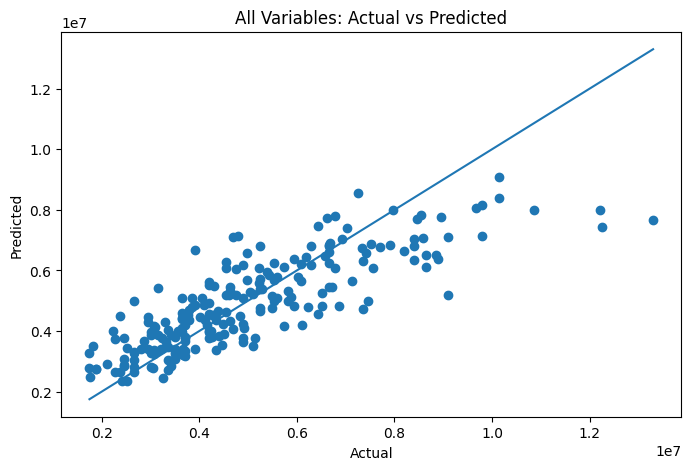


Top 2 varibales based upon correlation:
area         0.535997
bathrooms    0.517545
dtype: float64


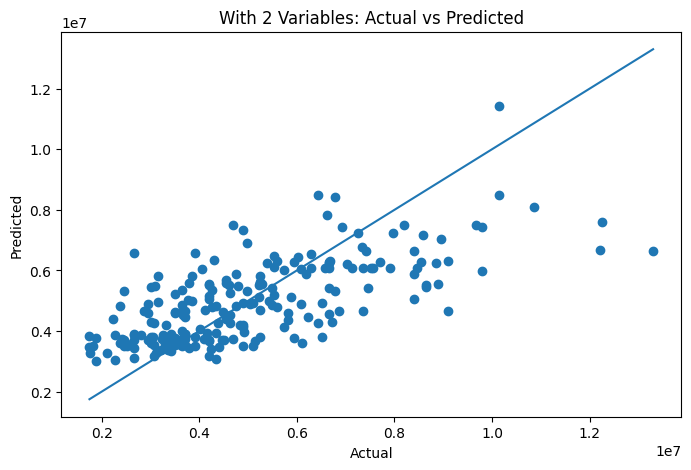

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from getpass import getuser

user = getuser()
csv_location = f'/home/{user}/dan/private/exrc_05/data/{user}_houses.csv'
# csv_location = "XXXXX_houses.csv"
# csv_location =  "FILE_NAME" ### GIVE FILE_NAME TO RUN THE CODE LOCALLY

# Load input CSV data which contains some fake data on sold houses into pandas.DataFrame
df = pd.read_csv(csv_location)

# # Get basic information about data
# print(df.info()) # prints concise summary about DataFrame's structure
# print(df.head()) # prints first five rows - default


# Get columns which contains only yes or no
yes_no_cols = [
    col
    for col in df.columns
    if df[col].astype(str).str.lower().isin(["yes", "no"]).all()
]

# print(yes_no_cols) # prints columns which contains only ´yes´ or ´no´ values

# Convert yes/no to 1/0
df[yes_no_cols] = df[yes_no_cols].apply(
    lambda col: col.astype(str).str.lower().map({"yes": 1, "no": 0}
    )                            )

# # Print sample data and dataframe information post coversion
# df.info()
# print(df.head())

# Add a dummy 1/0 variable to each of the ´furnishingstatus´ column value
df = pd.get_dummies(df, columns=["furnishingstatus"], drop_first=False, dtype=int)

# # Print sample data and dataframe information post one hot encoding ie creating dummy variable
# print(df.info())
# print(df.head())


##### Part 1: Linear regression where all the variables / features used  #####

# Split the data to 60% train, 40% test
X = df.drop(columns=["price"]) # Extract Features
y = df["price"] # Extract Response / Target

# print(X.dtypes) # to confirm all the features are of numeric data types

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.6, random_state=42 # random_state=42 is chosen to ensure same rows go to train and test every time
)

# fit a linear model to the train data with all the Features using training data
linreg_all = LinearRegression()
linreg_all.fit(X_train, y_train)

# Predicting with test data
y_pred_all = linreg_all.predict(X_test)

# Plotting Actual Vs Predicted where all Variables/Features used
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_all)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("All Variables: Actual vs Predicted")
plt.show()



##### Part 2: Linear regression where Only TWO variables / features used #####

# Compute correlations for all the features against response / target
correlations = X.corrwith(y)

# Find two variables / features based upon highest correlation value
top_two = correlations.abs().sort_values(ascending=False).head(2)
print("\nTop 2 varibales based upon correlation:")
print(top_two) 


X2 = df[top_two.index] # Exract Top 2 Variables / Features
y2 = df["price"] # Extract Response / Target

# Split the data to 60% train, 40% test
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, train_size=0.6, random_state=42 # random_state=42 is chosen to ensure same rows go to train and test every time
)

# fit a linear model to the train data with Only top 2 Variables of training data
linreg_2 = LinearRegression()
linreg_2.fit(X2_train, y2_train)

# Predicting with test data
y2_pred = linreg_2.predict(X2_test)

# Plotting Actual Vs Predicted where Only top 2 Variables/Features used
plt.figure(figsize=(8,5))
plt.scatter(y2_test, y2_pred)
plt.plot([y2_test.min(), y2_test.max()], [y2_test.min(), y2_test.max()])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("With 2 Variables: Actual vs Predicted")
plt.show()


## Problem 5. Housing, part 2

Study the Kaggle notebook mentioned in the previous exercise. In your own style and examples, please explain what is meant by

- Overfitting
- RFE
- K-fold CV.


### Solution 5

This document explains three important machine learning concepts
**Overfitting**, **RFE**, and **K-Fold Cross Validation** using
examples directly inspired by the **house price dataset** used in **Problem 4**.

------------------------------------------------------------------------

# 1. Overfitting

## What is Overfitting?

Overfitting happens when a machine learning model **memorizes the
training data** instead of learning general patterns.\
The model becomes too tailored to the specific examples it has seen and
performs poorly on new, unseen data.

It's like a student who memorizes answers to practice questions instead
of understanding the underlying concepts.

------------------------------------------------------------------------

## Example Using House Price Data

Imagine your model learns the exact price of each house based on
specific combinations:

-   *Area = 7420, Bathrooms = 2 → Price = 13,300,000*
-   *Area = 8960, Bathrooms = 4 → Price = 12,250,000*

This is memorized, not learned.

When you show it a new house:

    Area = 8200
    Bathrooms = 3
    Stories = 2

The model struggles because it has **not learned a general rule** like:

> "Higher area and more bathrooms tend to increase price."

Instead, it learned only the *exact* examples.

------------------------------------------------------------------------

## Symptoms of Overfitting

-   Very low error on training set
-   High error on test set
-   Complex or unnecessarily large models

------------------------------------------------------------------------

## Why Overfitting Happens

Overfitting typically occurs when:

-   The model is too complex (too many coefficients or features)
-   Too many irrelevant features
-   Not enough training data
-   No regularization used

------------------------------------------------------------------------

# 2. RFE --- Recursive Feature Elimination

## What is RFE?

RFE is a **feature selection technique** that automatically selects the
most important predictors by **removing the weakest features one at a
time**.

This continues until only the strongest features remain.

------------------------------------------------------------------------

## ⭐ Example Using House Price Data

Suppose your dataset has the following features:

-   `area`
-   `bedrooms`
-   `bathrooms`
-   `stories`
-   `parking`
-   `mainroad`
-   `guestroom`
-   `basement`
-   `airconditioning`
-   `prefarea`
-   dummy variables from `furnishingstatus`

RFE works like this:

### Step 1: Fit the model using all features

RFE evaluates feature importance.

### Step 2: Remove the least important feature

Maybe `guestroom` is weak.

### Step 3: Fit again without it

Evaluate remaining features.

### Step 4: Remove the next weakest

Maybe `prefarea`.

### Step 5: Continue until the desired number of features remain

For example, RFE might conclude that the **top 2 best predictors** are:

-   `area`
-   `bathrooms`

RFE finds features that *truly matter* for predicting house prices.

------------------------------------------------------------------------

## Why Use RFE?

-   Removes noise
-   Simplifies the model
-   Avoids unnecessary complexity

------------------------------------------------------------------------

# 3. K-Fold Cross Validation

## What is K-Fold CV?

K-Fold Cross Validation tests your model's performance more reliably by
splitting the data into **K parts** (folds) and training/testing the
model **K times**, each time using a different fold for testing.

It gives a more stable and fair estimation of your model's performance.

------------------------------------------------------------------------

## Example Using House Price Data

Assume you choose **K = 5**.

Your dataset is split into 5 equal folds:

    Fold 1: rows 1–109
    Fold 2: rows 110–218
    Fold 3: rows 219–327
    Fold 4: rows 328–436
    Fold 5: rows 437–545

------------------------------------------------------------------------

## The model is trained and tested 5 times

  | Round | Train On       | Test On |
|-------|----------------|---------|
| 1     | Folds 2–5      | Fold 1  |
| 2     | Folds 1, 3–5   | Fold 2  |
| 3     | Folds 1–2, 4–5 | Fold 3  |
| 4     | Folds 1–3, 5   | Fold 4  |
| 5     | Folds 1–4      | Fold 5  |


------------------------------------------------------------------------

## Each round produces a score (e.g., R²):

  | Fold | R² Score |
|------|----------|
| 1    | 0.64     |
| 2    | 0.66     |
| 3    | 0.62     |
| 4    | 0.68     |
| 5    | 0.65     |

------------------------------------------------------------------------
